In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sympy import sin, cos, tan, atan
from sympy import simplify, collect, expand, factor, apart, cancel 
from sympy.core.symbol import symbols, Symbol
from sympy import solveset, linsolve, solve 
from sympy import Eq, Function, Matrix 
from sympy.solvers.ode.systems import dsolve_system


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



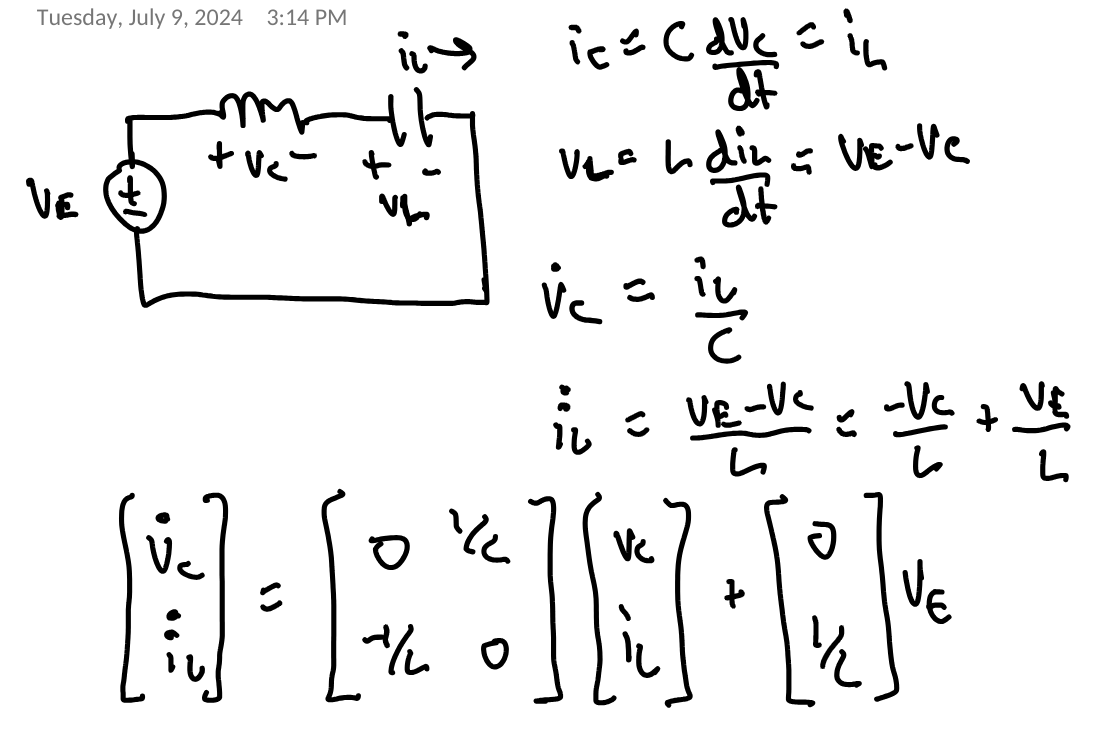


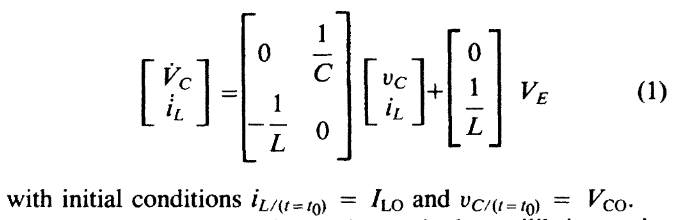

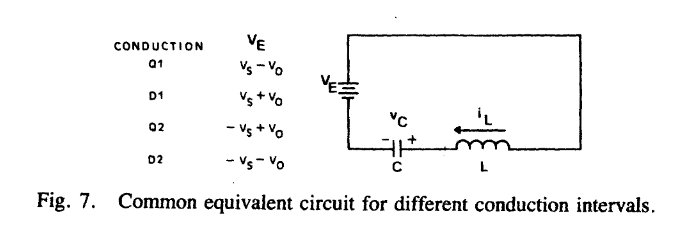


In [3]:
f, g = symbols("f g", cls=Function)
x, y, t = symbols('x y t')
vc = symbols("v_C", real=True, cls=Function)
il = symbols("i_L", real=True, cls=Function)
L = symbols("L", real=True, positive=True)
C = symbols("C", real=True, positive=True)
VE = symbols('V_{E}' ,real=True )
ILO = symbols('I_{LO}' ,real=True)
VCO = symbols('V_{CO}' ,real=True)
A = Matrix([[0, 1/C],[-1/L, 0]])
x = Matrix([[vc(t)],[il(t)]])
B = Matrix([[0],[VE/L]])
A
x
eqs = x.diff(t) - (A*x+B) 
eqs 


Matrix([
[   0, 1/C],
[-1/L,   0]])

Matrix([
[v_C(t)],
[i_L(t)]])

Matrix([
[          Derivative(v_C(t), t) - i_L(t)/C],
[Derivative(i_L(t), t) - V_{E}/L + v_C(t)/L]])

In [4]:
#ans = dsolve_system(eqs, ics={vc(0): VCO, il(0): ILO})
ans = dsolve_system(eqs, ics={vc(t).subs(t, 0): VCO, il(t).subs(t, 0): ILO})

In [5]:
simplify(simplify(ans[0][0]))

Eq(v_C(t), V_{CO}*cos(t/(sqrt(C)*sqrt(L))) - V_{E}*cos(t/(sqrt(C)*sqrt(L))) + V_{E} + I_{LO}*sqrt(L)*sin(t/(sqrt(C)*sqrt(L)))/sqrt(C))

In [6]:
expand(simplify(ans[0][1]))

Eq(i_L(t), -sqrt(C)*V_{CO}*sin(t/(sqrt(C)*sqrt(L)))/sqrt(L) + sqrt(C)*V_{E}*sin(t/(sqrt(C)*sqrt(L)))/sqrt(L) + I_{LO}*cos(t/(sqrt(C)*sqrt(L))))

In [174]:
A.trace()
A.det()

0

1/(C*L)

In [129]:
vcN = symbols('V_{CN}' ,real=True)
Vs = symbols('V_{S}' ,real=True)
VEN = symbols('V_{EN}' ,real=True, positive=True)
VE = symbols('V_{E}' ,real=True, positive=True)
iLN = symbols('i_{LN}' ,real=True, positive=True)
Zo = symbols('Z_o' ,real=True, positive=True)
ILON = symbols('I_{LON}' ,real=True)
ILO = symbols('I_{LO}' ,real=True)
VCON = symbols('V_{CON}' ,real=True)
VCO = symbols('V_{CO}' ,real=True)
w = symbols('omega')
theta = symbols('theta')
x, y, v = symbols('x y v')


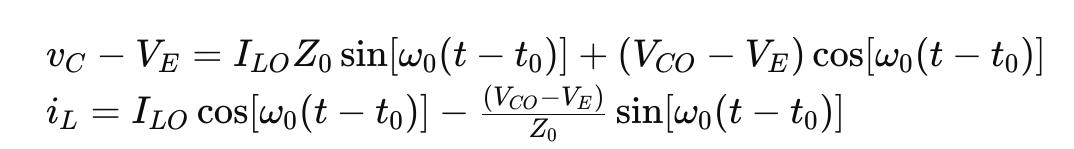

initial condition: $i_L(t=t_0) = I_{LO} = \frac{V_S}{Z_0}$

$i_{LN} = \frac{i_L}{I_{LO}}$

$v_{CON} = \frac{V_{CO} - V_E}{V_S}$

$I_{LON} = \frac{I_{LO}}{Vs/Z_0}=1$

in solving the above solution to the state space equation, keep the left side of the voltage equation together. 

In [130]:
exp1 = ILO*Zo*sin(theta) + (VCO-VE)*cos(theta)
exp2 = ILO*cos(theta) - (VCO-VE)*sin(theta)/Zo
exp1
exp2

I_{LO}*Z_o*sin(theta) + (V_{CO} - V_{E})*cos(theta)

I_{LO}*cos(theta) - (V_{CO} - V_{E})*sin(theta)/Z_o

In [131]:
exp3 = simplify(exp1.subs({ILO:Vs/Zo})/Vs)
exp4 = simplify(exp2.subs({ILO:Vs/Zo})/(Vs/Zo))
exp3
exp4

(V_{S}*sin(theta) + (V_{CO} - V_{E})*cos(theta))/V_{S}

(V_{S}*cos(theta) + (-V_{CO} + V_{E})*sin(theta))/V_{S}

In [132]:
expand(exp4).subs({VCO/Vs: VCON})

-V_{CON}*sin(theta) + V_{E}*sin(theta)/V_{S} + cos(theta)

In [133]:
#use vcN = (vc-VE)/Vs
exp3**2 + exp4**2
expand(exp3**2 + exp4**2)
simplify(expand(exp3**2 + exp4**2))

(V_{S}*sin(theta) + (V_{CO} - V_{E})*cos(theta))**2/V_{S}**2 + (V_{S}*cos(theta) + (-V_{CO} + V_{E})*sin(theta))**2/V_{S}**2

V_{CO}**2*sin(theta)**2/V_{S}**2 + V_{CO}**2*cos(theta)**2/V_{S}**2 - 2*V_{CO}*V_{E}*sin(theta)**2/V_{S}**2 - 2*V_{CO}*V_{E}*cos(theta)**2/V_{S}**2 + V_{E}**2*sin(theta)**2/V_{S}**2 + V_{E}**2*cos(theta)**2/V_{S}**2 + sin(theta)**2 + cos(theta)**2

(V_{CO}**2 - 2*V_{CO}*V_{E} + V_{E}**2 + V_{S}**2)/V_{S}**2

The expression above matches the right side of equation (5) in the paper ($I_{LON}=1$)
The state trajectories are circles with center $v_{CN}=V_{EN}$, where $V_{EN}$ depends on which part of conduction cycle the system is in (figure 7). 

$v_{CN}=V_{EN} = (V_s-V_o)/V_s= 1-V_{ON}$

$V_O=.5*V_S$

In [134]:
exp3 = simplify(exp1.subs({ILO:Vs/Zo})/Vs)
exp4 = simplify(exp2.subs({ILO:Vs/Zo})/(Vs/Zo))
#use vcN = (vc-VE)/Vs
exp5 = vcN  - expand(exp3).subs({VCO/Vs: VCON, VE/Vs:VEN})
exp6 = iLN - expand(exp4).subs({VCO/Vs: VCON, VE/Vs:VEN})
exp5
exp6

V_{CN} - V_{CON}*cos(theta) + V_{EN}*cos(theta) - sin(theta)

V_{CON}*sin(theta) - V_{EN}*sin(theta) + i_{LN} - cos(theta)

In [135]:
y = sin(theta) - solveset(exp5, sin(theta)).args[0]
x = cos(theta) - solveset(exp6, cos(theta)).args[0]
x
y

-V_{CON}*sin(theta) + V_{EN}*sin(theta) - i_{LN} + cos(theta)

-V_{CN} + V_{CON}*cos(theta) - V_{EN}*cos(theta) + sin(theta)

In [136]:
exp7 = x.subs({cos(theta): solveset(y, cos(theta)).args[0]}) 
exp7
sin_theta = solveset(exp7, sin(theta)).args[0]
sin_theta

-V_{CON}*sin(theta) + V_{EN}*sin(theta) - i_{LN} + (V_{CN} - sin(theta))/(V_{CON} - V_{EN})

(V_{CN} - V_{CON}*i_{LN} + V_{EN}*i_{LN})/(V_{CON}**2 - 2*V_{CON}*V_{EN} + V_{EN}**2 + 1)

In [137]:
cos_theta = solveset(x.subs({sin(theta): sin_theta}), cos(theta)).args[0]
cos_theta

V_{CON}*(V_{CN} - V_{CON}*i_{LN} + V_{EN}*i_{LN})/(V_{CON}**2 - 2*V_{CON}*V_{EN} + V_{EN}**2 + 1) - V_{EN}*(V_{CN} - V_{CON}*i_{LN} + V_{EN}*i_{LN})/(V_{CON}**2 - 2*V_{CON}*V_{EN} + V_{EN}**2 + 1) + i_{LN}

In [138]:
cos_theta2 = solveset(y.subs({sin(theta): sin_theta}), cos(theta)).args[0]
cos_theta2

(V_{CN}*V_{CON} - V_{CN}*V_{EN} + i_{LN})/(V_{CON}**2 - 2*V_{CON}*V_{EN} + V_{EN}**2 + 1)

In [139]:
simplify(cos_theta1 - cos_theta2)

0

In [142]:
y, x = linsolve([exp5, exp6], (sin(theta), cos(theta))).args[0]
x 
y 
tan_theta = y/x
#don't forget vcN = (vc-VE)/Vs

(V_{CN}*V_{CON} - V_{CN}*V_{EN} + i_{LN})/(V_{CON}**2 - 2*V_{CON}*V_{EN} + V_{EN}**2 + 1)

(V_{CN} - V_{CON}*i_{LN} + V_{EN}*i_{LN})/(V_{CON}**2 - 2*V_{CON}*V_{EN} + V_{EN}**2 + 1)

In [143]:
simplify(x - cos_theta2)
simplify(y - sin_theta)

0

0

In [145]:
tan_theta

(V_{CN} - V_{CON}*i_{LN} + V_{EN}*i_{LN})/(V_{CN}*V_{CON} - V_{CN}*V_{EN} + i_{LN})

### reverse engineer the paper's $\tan(\theta)$
it actually matches the one above. The relevant identity is $\tan(\alpha \pm \beta) = \frac{\tan \alpha \pm \tan \beta}{1 \mp \tan \alpha \tan \beta}$ But I get inverses of $\alpha$ and $\beta$ somehow. Regardless, my $\tan(\theta)$ matches the paper via substraction test. 
https://uvmoffice-my.sharepoint.com/:o:/g/personal/03eivers_uvm_edu/EmA8ICJquiZBmeBJ8AaVIZ8BKajqj_H4ltSqWeFXwhXzAg?e=Ee14hH

In [149]:
tan_theta0 = -ILON/(VCON-VEN)
#exp = -(iLN/(vcN-VEN)) - (tan(theta) - ILON/(VCON-VEN))/(1+tan(theta)*ILON/(VCON-VEN))

In [157]:
exp = -(iLN/(vcN)) -(tan(theta) + tan_theta0) / (1- tan(theta)*tan_theta0)
exp
solve(exp, tan(theta))[0]
solve(exp, tan(theta))[0].subs({ILON:1}) - tan_theta

-(-I_{LON}/(V_{CON} - V_{EN}) + tan(theta))/(I_{LON}*tan(theta)/(V_{CON} - V_{EN}) + 1) - i_{LN}/V_{CN}

(I_{LON}*V_{CN} - V_{CON}*i_{LN} + V_{EN}*i_{LN})/(I_{LON}*i_{LN} + V_{CN}*V_{CON} - V_{CN}*V_{EN})

0